# [ML-09] Text embedding

## What is an embedding?

Embedding vectors are one of the basic ingredients in the top performing models that are all the rage nowadays. They have already been mentioned in the preceding lecture. In general, an **embedding** is a representation of a piece of information, such as a word, a sentence or an image, as a vector in a space of a given dimension. Typical **embedding dimensions**, for the embedding models that you can manage in your computer, are 384, 512, 768 and 1,024. Nevertheless, the large language models that we use in a remote way, such as GPT-4 or Gemini, work with higher embedding dimensions.

For an embedding to be useful, "similar" pieces of information must be represented by vectors that are close in a geometric sense (the distance between the endpoints, or the angle). For instance, in a word embedding, words with similar meanings, such as 'nice' and 'beautiful', will be represented by close vectors. Unrelated words, such as 'computer' and 'dog', will be represented by non-close vectors.

When we use an ML model to create embedding vectors associated to images or texts, we say that we are *encoding* them. In particular, we use **large language models** (LLMs) for that purpose in the last two lectures.

## Applications of embeddings

Applications of embeddings have already appeared in the examples of this course, though they were not presented in that way:

* In lecture ML-07, we encoded the MINST data with a CNN model. The convolutional base of that model can be seen as an **embedding model** providing a representation of dimension 576 of the digit images.

* In lecture ML-08, we encoded the dogs and cats images with the model VGG16. The embedding dimension was 8,192.

Two additional forthcoming examples are:

* The example of this lecture uses an LLM to encode news titles. The embedding representation, of dimension 384, provides the features for **fake news detection**, which is a binary classification task.

* In the example of the next lecture, the same embedding model is used to encode tweets for **sentiment analysis**.

In these last two examples, the embedding provides a special type of **feature engineering**, extracting the features from the text. Embedding representations can be also instrumental in semantic search, clustering, recommendation, outlier detection and other applications, but we have no room for more in this course.

## Text embeddings

We have already seen **image embeddings** in this course. They were based on CNN models (not the only option). We focus now on **text embeddings**. Text embedding models can operate at different levels: character, word, etc.

**Word embeddings** gave a strong push to natural language processing in 2013, when Google released **Word2Vec**. A word embedding consists of a list of words, called **vocabulary** (also dictionary), and the corresponding list of vectors, all of the same length. Word2Vec was not a single embedding, but a methodology allowing the choice of different options, among them the embedding dimension.

Even if word embeddings were a big step forward, models based on them have a strong limitation, that the vector associated to a word, which should embody its meaning, is fixed. But the meaning of a word is not fixed, it depends on the context, that is, on the other words in the sentence. See the following example:

* I got money from the *bank*.

* The boat hit the river *bank*.

The order of the words also affects the meaning of the sentence, as we see in:

* He *only* said "I love you" (he said nothing else).

* He said "I love *only* you" (he doesn't love any one else).

After various attempts, Google came up in 2018 with a model called **BERT**, which they used to improve their Internet engine search. BERT has a vocabulary of **tokens**, with the corresponding embedding vectors. A token is a substring, which does not always match a word (*e.g*. the word 'really' can be split in two tokens, 'real' and 'ly'). We'll say something else about tokens in the next lecture.

BERT splits the input text in a sequence of tokens and forms the corresponding sequence of vectors. Then, it modifies these input vectors to make them **contextual**, that is, dependent on the other tokens and their order in the text. For most applications, these contextual embedding vectors are averaged to get a single embedding vector for the whole input string. What is called nowadays an embedding model does exactly this: it takes a string and returns a vector. 

BERT was based on a network architecture called the **transformer**. Though the original BERT is probably no longer active, the embedding models currently provided by the AI industry are more or less based on BERT. In this lecture, we use a model developed by Microsoft, which like a smaller version of BERT, derived from the original BERT by means of a technique called **deep self-attention distillation**.

## Ollama

**Ollama** is an application which can be used for managing LLMs locally, that is, in your computer. With Ollama, you can install the top popular open source models. Some them, like `gpt-oss`, `deepseek-r1` or `llama3`, may sound familiar to you. But these are models for text generation, not for embedding, which is what we are coincerned with in this lecture. Information on the embedding models available in the Ollama platform in `https://ollama.com/search?c=embedding`.

To install Ollama in your computer, go to `https://ollama.com` and follow the indications. Once you have it running in your computer (it runs in the background, you don't have to "open" it), go to the shell to pull the model that we use in this lecture from the Ollama repo with:
```
ollama pull all-minilm:33m
```

The embedding model `all-minilm:33m` is a small one, often used for tutorials. The embedding dimension is 384, one half of 768, which is a legacy of older models (apparently GPT-2 and other ancestors were using size 768 for various reasons), but this number has nothing special. You can check that everything is OK with:

```
ollama list
```

Next, you can install the Python package to manage the Ollama models in the usual way:

```
pip install ollama
```

Now, you are ready for the example.

## Example - Fake news detection

### Introduction

**Social media** is a vast pool of content, and among all the content available for users to access, news is an element that is accessed most frequently. News can be posted by politicians, news channels, newspaper websites, or even common civilians. The posts should be checked for their authenticity, since spreading misinformation has been a real concern in today's times, and many firms are taking steps to make the common people aware of the consequences of spreading misinformation. The measure of authenticity of the news posted online cannot be definitively measured, since the manual classification of news is tedious and time-consuming, and also subject to bias.

In an era where fake WhatsApp forwards and tweets (now *X* posts) are capable of influencing naive minds, tools and knowledge have to be put to practical use in not only mitigating the spread of misinformation but also to inform people about the type of news they consume. Fact-checking websites, built-in plugins and article parsers should be refined, made easier to access and, more importantly, there should be more awareness about this question.

Several data sets have been released for training and benchmarking **fake news detection** models. This example uses data released in 2018 by William Lifferth, for a Kaggle competition. The news included are from the **Trump vs Clinton** times, so the models obtained should not be expected to work in other contexts.

### The data set

The data set, containing 20,800 news articles, has been split in two parts, which come in the files `fake1.csv` and `fake2.csv` (zipped). The columns are:

* `id`, unique identifier for the article. Just a counter.

* `title`, the title of the article, with some missing values.

* `author`, the author of the article, with some missing values.

* `text`, the text of the article, with some missing values. The text could be incomplete.

* `label`, a label that marks the article as potentially unreliable.

Source: William Lifferth (2018), *Fake News Kaggle*, `https://kaggle.com/competitions/fake-news`.

### Questions

Q1. Clean the data, dropping the author (our model will not use this) and the articles with missing title or text.

Q2. Encode the titles using a **text embedding model**. Pack the embedding vectors in a matrix so every row corresponds to one article.

Q3. Using this matrix as the features matrix, train a **logistic regression model** for fake news detection.

Q4. Take a look at the distribution of the **predictive scores**.

### Importing the data

Assuming that the Ollama stuff is ready, we import the data, as two Pandas data frames, from our GitHub repository. Then we concatenate the two parts to get a single data frame. We set the column `id` as the index.

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df1 = pd.read_csv(path + 'fake1.csv.zip', index_col=0)
df2 = pd.read_csv(path + 'fake2.csv.zip', index_col=0)
df = pd.concat([df1, df2], axis=0)

We explore this as usual.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 812.5+ KB


As shown in the report above, we have data on 20,800 articles, but only the labels are complete. The articles with missing title must discarded for this example.

This is how the data look like, so far.

In [3]:
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Q1. Cleaning the data

We clean the data set as suggested, deleting the rows with missing values with the method `.dropna()`.

In [4]:
df = df.drop(columns=['author']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20203 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20203 non-null  object
 1   text    20203 non-null  object
 2   label   20203 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 631.3+ KB


With the method `.describe()`, we create a summary for the length (number of characters) of titles and texts. This shows that some of the articles should be filtered out if the detection were to be based on the text (we leave that for the homework).

In [5]:
pd.concat([df['title'].str.len(), df['text'].str.len()], axis=1).describe()

,title,text
count,20203.000000,20203.000000
mean,74.275603,4668.044251
std,23.135718,5151.439764
min,3.000000,1.000000
25%,60.000000,1747.000000
50%,75.000000,3495.000000
75%,88.000000,6364.000000
max,456.000000,142961.000000


Some very short titles may be expected to be deficient, but we don't find them so. So, we keep them.

In [6]:
df['title'][df['title'].str.len() < 5]

id
2561     Wow!
15728     Rum
17081    EPIC
Name: title, dtype: object

48.6% of the articles come labeled as fake, so the data set is quite balanced. It makes sense to use the **accuracy** to evaluate the model.

In [7]:
round(df['label'].mean(), 3)

np.float64(0.486)

## Q2. Encoding the titles

We import the appropriate function from the package `ollama`.

In [8]:
from ollama import embed

The input text has to be inputted as a list to the `ollama` function `embed()`, so we convert the column `title` of our data set to a list.

In [9]:
titles = df['title'].tolist()

This function returns an object that contains the embedding vectors plus metadata which will not be used here.

In [10]:
embeds = embed(model='all-minilm:33m', input=titles)
type(embeds)

ollama._types.EmbedResponse

We extract the vectors as the attribute `embeddings`.

In [11]:
embeds = embeds.embeddings

Now, `embeds` is a list of length 20,203, with one item for every data point.

In [ ]:
len(embeds)

20203

Every item is a list containing the 384 terms of an embedding vector.

In [12]:
len(embeds[0])

384

### Q3. Logistic regression model

To get a predictive model, we follow the usual steps. We specify the target vector as the ´label` column of our data set, filling the features matrix with the embedding vectors. We maintain the notation for consistency with previous examples.

In [13]:
import numpy as np
y = df['label']
X = np.array(embeds)

Not that every row in `X`is the embedding vector for the corresponding title. 

In [14]:
X.shape

(20203, 384)

We initialize an estimator from the scikit-learn class `LogisticRegression`. The defaut number of iterations will be enough, because the embedding vectors extracted by this model are normalized (length one).

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

We apply the methods `.fit()` and `.score()` as usual. Nothing new here. The accuracy is 90.4%, which is quite satisfactory, though we cannot take this out of context. Nevertheless, this figure can be improved with better encoders that use higher embedding dimensions (the encoding process will be slower then). There are some suggestions in the homework.

In [16]:
clf.fit(X, y)
round(clf.score(X, y), 3)

0.904

The predicted class can be calculated as usual.

In [17]:
y_pred = clf.predict(X)

Now, the **confusion matrix** shows that the model gives more false positives than false negatives.

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[9221, 1166],
       [ 770, 9046]])

### Q4. Distribution of the predictive scores

This section does not contain anything new from a methodological point of view. We already know how to extract the predictive scores with the method `.predict_proba()`:

In [19]:
df['title_score'] = clf.predict_proba(X)[:, 1]

Now, we plot separate histograms for the predictive scores, for fake and non-fake news. This may give you an idea of how you can reduce the false positive rate by setting a threshold for the predictive scores.

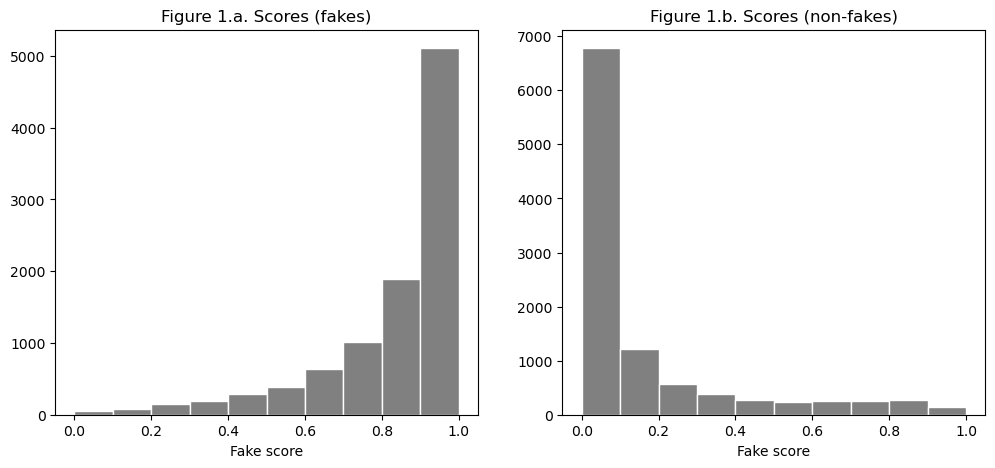

In [20]:
from matplotlib import pyplot as plt
# Set the size of the figure
plt.figure(figsize=(12,5))
# First subplot
plt.subplot(1, 2, 1)
plt.hist(df['title_score'][y == 1], range=(0,1), color='gray', edgecolor='white')
plt.title('Figure 1.a. Scores (fakes)')
plt.xlabel('Fake score')
# Second subplot
plt.subplot(1, 2, 2)
plt.hist(df['title_score'][y == 0], range=(0,1), color='gray', edgecolor='white')
plt.title('Figure 1.b. Scores (non-fakes)')
plt.xlabel('Fake score');

### Homework

1. Use a train/test split to validate our logistic regression model.

2. Train an MLP model, with one hidden layer, to the title data. Do you get better results than with the logistic regression model?

3. **Granite** is a family of open-source models released by IBM. The Granite Embedding 278M model is a multilingual version supported by Ollama. Download it to your computer (`ollama pull granite-embedding:278m`) and try it with the title data. The embedding dimension is 768, so you can expect to improve the current results, and to face a slower encoding process. *Warning*: this model will take 563M of your hard disk space.